#**Artificial neural network in keras**
For this assigment I work on a artificial neural network to classify roses and 
sunflowers. It was developed in Keras, this is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. 

The dataset used belongs to Kaggle, an online community of data scientists and machine learning practitioners, to access click [here](https://www.kaggle.com/alxmamaev/flowers-recognition)
>  Pijal Toapanta Washington Danilo





#Load the dataset from google drive drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Python Libraries

In [1]:
import os 
import matplotlib.pyplot as plt  # Plot results
from matplotlib.image import imread # To read images imagenes
from PIL import Image # Python Imaging Library (Pillow) adds powerful image processing capabilities.
from IPython.display import display # to display images


###Creating paths to image dataset in Google Drive

In [ ]:
rose_images = os.listdir('/content/drive/Shareddrives/Mi Personal Info/flowers/rose') #Read images of roses
sunflower_images = os.listdir('/content/drive/Shareddrives/Mi Personal Info/flowers/sunflower') # Read images of sunflower
print("Roses",rose_images[:3], len(rose_images))
print("Sunflower",sunflower_images[:3], len(sunflower_images))

Roses ['18492342231_c074b4b19c_n.jpg', '2122401867_cd86c5f114_n.jpg', '2053476785_c162a3e358.jpg'] 611
Sunflower ['10386522775_4f8c616999_m.jpg', '10386525695_2c38fea555_n.jpg', '127192624_afa3d9cb84.jpg'] 744


In [ ]:
rose_images_path = ['/content/drive/Shareddrives/Mi Personal Info/flowers/rose/' + dir for dir in rose_images]
sunflower_images_path = ['/content/drive/Shareddrives/Mi Personal Info/flowers/sunflower/' + dir for dir in sunflower_images]
print(rose_images_path[:1], len(rose_images_path))
print(sunflower_images_path[:1], len(sunflower_images_path))

['/content/drive/Shareddrives/Mi Personal Info/flowers/rose/18492342231_c074b4b19c_n.jpg'] 611
['/content/drive/Shareddrives/Mi Personal Info/flowers/sunflower/10386522775_4f8c616999_m.jpg'] 744


--------------------ROSES-----------------------------


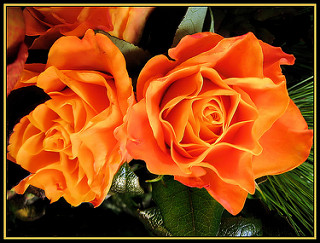

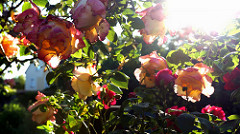

---------------------SUNFLOWERS----------------------------


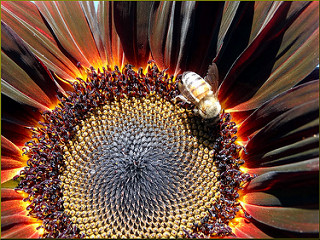

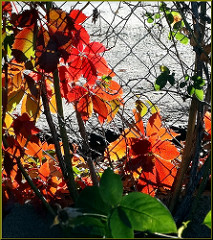

In [ ]:
print('--------------------ROSES-----------------------------')
for i in range(2):
    im = Image.open(rose_images_path[-i+1], 'r')
    display(im)
print('---------------------SUNFLOWERS----------------------------')
for i in range(2):
    im = Image.open(sunflower_images_path[-i+1], 'r')
    display(im)
  

### Define the number of images from the dataset

In [ ]:
size = 611  # Data set must be the same size
path_roses = [dir for dir in rose_images_path][:size]
path_sun = [dir for dir in sunflower_images_path][:size]
print(path_roses[:1], len(path_roses))
print(path_sun[:1], len(path_sun))


['/content/drive/Shareddrives/Mi Personal Info/flowers/rose/18492342231_c074b4b19c_n.jpg'] 611
['/content/drive/Shareddrives/Mi Personal Info/flowers/sunflower/10386522775_4f8c616999_m.jpg'] 611


# Image preprocessing

In [2]:
# Support for large, multi-dimensional arrays and matrices,
import numpy as np 
# It helps to go from raw data on disk to a tf. data.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


In [ ]:
imgs = list() # List of images
labels = list() # 1 = roses; 0 =  Sunflowers

dim = 409 # Resize de image

for i in range(size):
    img = load_img((path_roses[i]), target_size=(dim, dim),
                  color_mode = "grayscale")
    imgs.append(img_to_array(img))
    labels.append(1) # Roses
    
    img = load_img((path_sun[i]), target_size=(dim, dim),
                  color_mode = "grayscale")
    imgs.append(img_to_array(img))
    labels.append(0) # Sunflowers
    
array_imgs = np.asarray(imgs)
array_labels = np.asarray(labels)

### Changes the range of pixel intensity values. [0-255]


In [ ]:
def normalize_scale(image_data):
    scale_min = 0
    scale_max = 255
    return ((image_data - scale_min) / (scale_max - scale_min))

array_imgs_scale = normalize_scale(array_imgs)
print(array_imgs_scale.shape) # See the shape of the images

(1222, 409, 409, 1)


Display a image

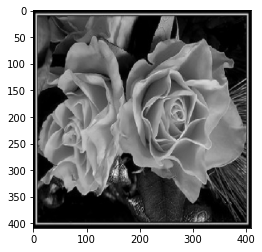

In [ ]:
array_imgs_scale_v2 = array_imgs_scale.reshape(size*2,-1)\
.reshape(size*2, dim, dim)

plt.imshow(array_imgs_scale_v2[2], cmap='gray')
plt.show()

# Dividing Data Set

In [ ]:
#function in Sklearn model selection for splitting data arrays into two subsets
from sklearn.model_selection import train_test_split 

***x = images y = label***

### Training set: To train the neural network.


1.   X_fit 
2.   y_fit


### Validation set: Validate if the training is correct


1.   X_val
2.   Y_val


### Test set: See how good or bad our neural network is


1.   X_test
2.   y_test





In [ ]:
X_fit, X_test, y_fit, y_test = train_test_split(array_imgs_scale,
                                                array_labels,
                                               test_size=0.4,
                                               random_state = 42)

X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                               test_size=0.01,
                                               random_state = 42)
X_fit.shape, X_val.shape, X_test.shape

((733, 409, 409, 1), (484, 409, 409, 1), (5, 409, 409, 1))

#Neural Network on keras

In [3]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D # Convolutional Layer in 2 dimension
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD # Optimizer
from keras.callbacks import EarlyStopping # Evitar que sobreentrene
from keras.layers.advanced_activations import PReLU
import tensorflow as tf

In [ ]:
def define_model():
    #  Stack of layers where each layer has exactly one input tensor and one 
    # output tensor.
    model = Sequential()
    # * The activation function is Rectified Linear Unit, The function returns
    #   0 if it receives any negative input
    # * Define the way to set the initial random weights of Kera layer.
    model.add(Conv2D(dim, (2,2), activation='relu',
                    kernel_initializer='he_uniform',
                    input_shape=(dim, dim, 1)))
    
    # Pooling layer
    model.add(MaxPooling2D((2, 2))) 
    
    # 20% of the neurons are deactivated
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (2,2), activation='relu',
                    kernel_initializer='he_uniform'))
    
    model.add(MaxPooling2D((2, 2)))

    # reshapes the tensor to have the shape that is equal to the number of
    # elements contained in tensor non including the batch dimension
    model.add(Flatten()) 

    # Layer that is deeply connected with its preceding layer
    model.add(Dense(32)) 

    # The idea is predict the probability as an output. 
    # Since probability of anything exists only between the range of 0 and 1,
    model.add(Dense(1, activation='sigmoid')) 

    # Stochastic gradient descent optimizer with a learning rate 
    opt = SGD(lr=0.005)

    # The binary_crossentropy function computes the cross-entropy loss between
    # true labels and predicted labels.
    model.compile(optimizer=opt, loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [ ]:
model = define_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Stop training once the model performance stops improving on a hold out validation dataset.

In [ ]:
callbacks = [EarlyStopping(monitor='val_accuracy',
                          patience=2,
                          restore_best_weights=True)]

In [ ]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
with tf.device("/device:GPU:0"):
    history = model.fit(X_fit, y_fit,
                  
                  # the number of complete passes through the training dataset.
                            epochs = 10,
                  
                            callbacks=callbacks,
                  
                  #includes both progress bar and one line per epoch
                            verbose = 1,
                  
                  #Number of samples processed before the model is updated
                            batch_size=2,
                  
                            validation_data=(X_val, y_val))

Epoch 1/10
367/367 [==============================] - 60s 161ms/step - loss: 1.2516 - accuracy: 0.5075 - val_loss: 0.6908 - val_accuracy: 0.6033
Epoch 2/10
367/367 [==============================] - 59s 160ms/step - loss: 0.6877 - accuracy: 0.5907 - val_loss: 0.6809 - val_accuracy: 0.5909
Epoch 3/10
367/367 [==============================] - 59s 160ms/step - loss: 0.6724 - accuracy: 0.6385 - val_loss: 0.6660 - val_accuracy: 0.6074
Epoch 4/10
367/367 [==============================] - 59s 160ms/step - loss: 0.6432 - accuracy: 0.6617 - val_loss: 0.6471 - val_accuracy: 0.6322
Epoch 5/10
367/367 [==============================] - 59s 160ms/step - loss: 0.6086 - accuracy: 0.6698 - val_loss: 0.6687 - val_accuracy: 0.6364
Epoch 6/10
367/367 [==============================] - 69s 188ms/step - loss: 0.5836 - accuracy: 0.7053 - val_loss: 0.6430 - val_accuracy: 0.6116
Epoch 7/10
367/367 [==============================] - 58s 159ms/step - loss: 0.4989 - accuracy: 0.7735 - val_loss: 0.6275 - val_ac

In [ ]:
# Save the model
model.save('sunflowersvsRoses.h5')

# Save history
np.save('my_history.npy',history.history)

In [ ]:
# Recreate the exact same model just from the file
new_model = load_model('sunflowersvsRoses.h5')

# Recover history data
history=np.load('my_history.npy',allow_pickle='TRUE').item()

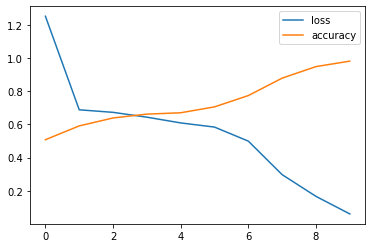

In [ ]:
plt.plot(history['loss'], label='loss')
plt.plot(history['accuracy'], label='accuracy')
plt.legend()
plt.show()

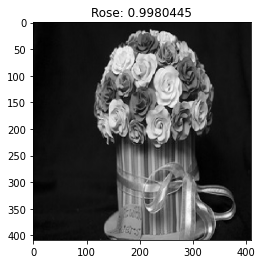

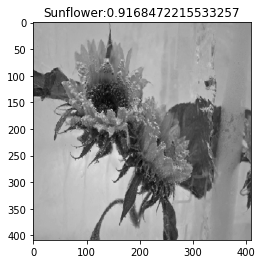

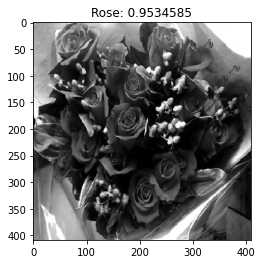

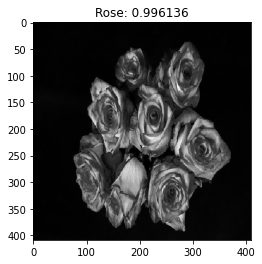

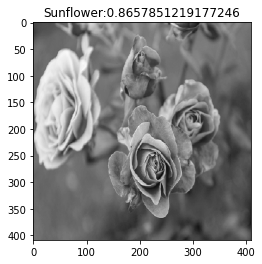

In [ ]:
# We do the predictions on the X_test images.
y_preds = new_model.predict(X_test)
y_preds = [x[0] for x in y_preds]
i=0
for images in X_test:
  plt.imshow(images.reshape(409,409), cmap='gray')
  if(y_preds[i]>0.5):
    plt.title("Rose: "+str(y_preds[i]))
  else:
    plt.title("Sunflower:"+str(1-y_preds[i]))
  plt.show()
  i+=1
